In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('designed.csv')
df.head(3)

,make_model,body_type,price,vat,km,prev_owner,hp,Inspection new,Warranty,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,CO2 Emission,Emission Class,Gears,Country version,age,vehicle_condition,fuel_type,is_metalic,Upholstery_type,Consumption(comb),Consumption(city),Bluetooth,Sound system,Hands-free equipment,On-board computer,USB,Radio,Television,Digital radio,CD player,MP3,Leather seats,Navigation system,Panorama roof,Keyless central door lock,Heads-up display,Seat ventilation,Wind deflector,Parking assist system sensors rear,Start-stop system,Massage seats,Parking assist system camera,Split rear seats,Tinted windows,Leather steering wheel,Light sensor,Power windows,Parking assist system sensors front,Heated steering wheel,Auxiliary heating,Windshield,Electric tailgate,Automatic climate control,Air suspension,Seat heating,Sunroof,Hill Holder,Cruise control,Air conditioning,Multi-function steering wheel,Lumbar support,Electrically heated windshield,Electrically adjustable seats,Electrical side mirrors,Parking assist system self-steering,Rain sensor,Electric Starter,Armrest,Park Distance Control,Sport seats,Handicapped enabled,Cab or rented Car,Alloy wheels,Catalytic Converter,Sport package,Roof rack,Voice Control,Sliding door,Tuned car,Winter tyres,Right hand drive,Touch screen,Ski bag,Shift paddles,Trailer hitch,Sport suspension,Daytime running lights,Side airbag,Xenon headlights,Central door lock with remote control,Emergency system,Lane departure warning system,Alarm system,Adaptive headlights,Fog lights,Emergency brake assistant,Adaptive Cruise Control,LED Headlights,Traction control,Immobilizer,Electronic stability control,Rear airbag,Blind spot monitor,Tire pressure monitoring system,Power steering,Driver drowsiness detection,Isofix,Head airbag,Driver-side airbag,LED Daytime Running Lights,Traffic sign recognition,Central door lock,Night view assist,Passenger-side airbag,ABS
0,Audi A1,Sedans,15770,True,56013.0,2.0,66.0,True,0.0,Black,5.0,5.0,Automatic,1422.0,3.0,front,99.0,6,NaN,NaN,3.0,Used,Diesel,True,Cloth,3.8,4.3,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,True,False,True,False,True,True,True,True,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,True,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True
1,Audi A1,Sedans,14500,True,80000.0,NaN,141.0,False,0.0,Red,3.0,4.0,Automatic,1798.0,4.0,front,129.0,6,7.0,NaN,2.0,Used,Gasoline,False,Cloth,5.6,7.1,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,False,True,True,True,False,False,True,False,True,True
2,Audi A1,Sedans,14640,True,83450.0,1.0,85.0,False,0.0,Black,4.0,4.0,Automatic,1598.0,NaN,front,99.0,6,NaN,NaN,3.0,Used,Diesel,True,Cloth,3.8,4.4,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True


In [3]:
df.columns.to_list()

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'hp',
 'Previous Owners',
 'Inspection new',
 'Warranty',
 'Body Color',
 'Paint Type',
 'Nr. of Doors',
 'Nr. of Seats',
 'Gearing Type',
 'Displacement',
 'Cylinders',
 'Drive chain',
 'Fuel',
 'CO2 Emission',
 'Emission Class',
 'Gears',
 'Country version',
 'age',
 'vehicle_condition',
 'Upholstery_type',
 'Consumption(comb)',
 'Consumption(city)',
 'Consumption(country)',
 'Sound system',
 'CD player',
 'Digital radio',
 'Hands-free equipment',
 'On-board computer',
 'USB',
 'MP3',
 'Television',
 'Bluetooth',
 'Radio',
 'Rain sensor',
 'Electrical side mirrors',
 'Air conditioning',
 'Seat heating',
 'Electrically adjustable seats',
 'Split rear seats',
 'Cruise control',
 'Massage seats',
 'Parking assist system self-steering',
 'Leather seats',
 'Keyless central door lock',
 'Electrically heated windshield',
 'Heated steering wheel',
 'Tinted windows',
 'Windshield',
 'Panorama roof',
 'Sunroof',
 'Navigation system',
 'Par

# Duplicate eden satırlardan kurtulalım

In [4]:
df.drop_duplicates(inplace = True)

# make_model

In [5]:
model_liste = df.make_model.value_counts().index.to_list()

In [6]:
models = df.make_model.value_counts()

In [7]:
models  #Null değer yok

Audi A3           2809
Opel Insignia     2413
Audi A1           2396
Opel Astra        2325
Opel Corsa        2048
Renault Clio      1496
Renault Espace     885
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

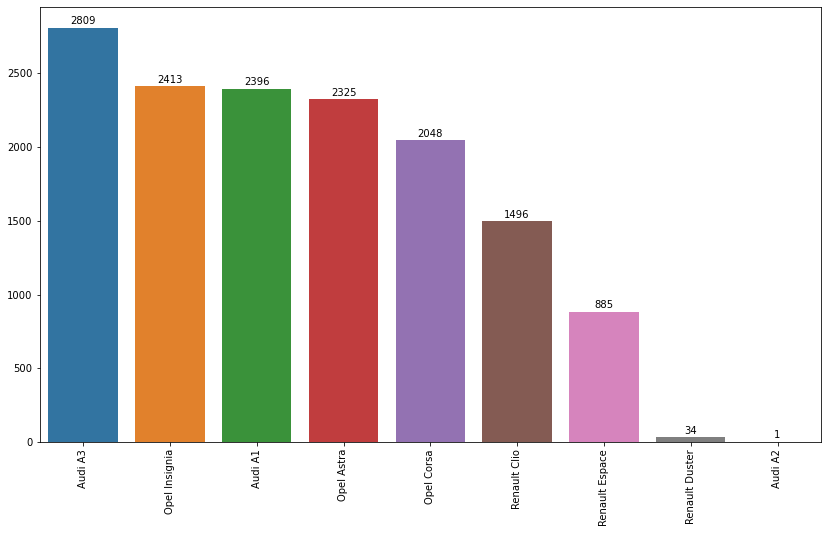

In [8]:
plt.figure(figsize=[14,8])
sns.barplot(models.index, models.values);
plt.xticks(rotation =90);
for i,v in enumerate(models.values):
    plt.text(i,v+10, str(v),va='bottom', ha = 'center')
plt.show()

# body_type

In [9]:
body = df.body_type.value_counts()

In [10]:
body

Sedans           7204
Station wagon    3304
Compact          2686
Van               708
Other             283
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

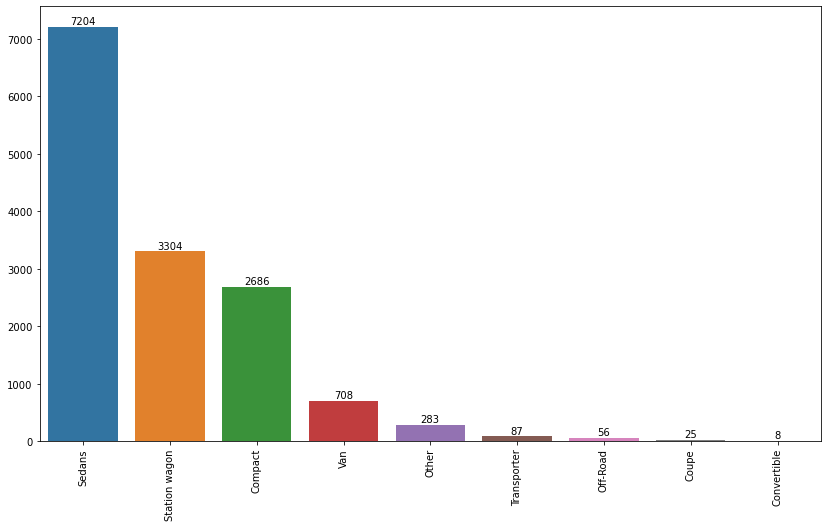

In [11]:
plt.figure(figsize=[14,8])
sns.barplot(body.index, body.values);
plt.xticks(rotation =90);
for i,v in enumerate(body.values):
    plt.text(i,v+10, str(v),va='bottom', ha = 'center')
plt.show()

In [12]:
df.body_type.isnull().sum()  #46 null değerim var en fazla olan ile dolduruyoruz.

46

In [13]:
for i in model_liste:
    df.loc[(df.make_model == i) & (df.body_type.isnull()), 'body_type'] = df[df.make_model == i].body_type.mode()[0]

In [14]:
df.body_type.isnull().sum()

0

# Price

In [15]:
df.price.isnull().sum()

0

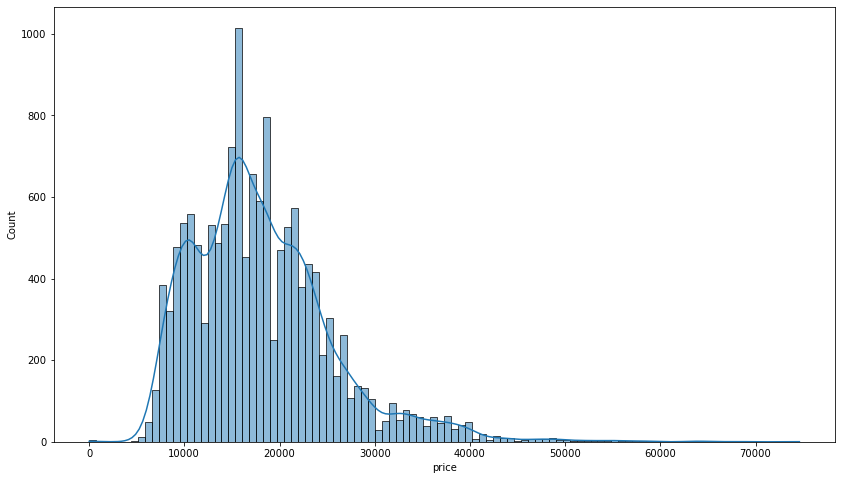

In [16]:
plt.figure(figsize=[14,8])
sns.histplot(df.price, kde = True);

# vat

In [17]:
df.vat.isnull().sum()
#Sütunlar düzenlenirken vat deductible olan yerler True, Nan olanlar False ile doldurulmuştu.

0

In [18]:
vat = df.vat.value_counts()

In [19]:
vat

True     10401
False     4006
Name: vat, dtype: int64

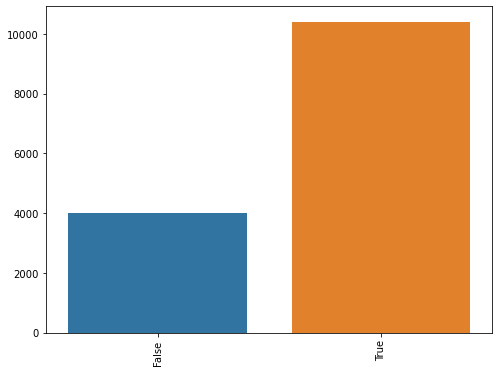

In [20]:
plt.figure(figsize=[8,6])
sns.barplot(vat.index, vat.values);
plt.xticks(rotation =90);
plt.show()

# 'vehicle_condition'

In [21]:
df['vehicle_condition'].value_counts(dropna = False)
# Temiz bir sütun. 2 nan var

Used              11874
New                1426
Pre-registered     1105
NaN                   2
Name: vehicle_condition, dtype: int64

In [22]:
df[df['vehicle_condition'].isnull()].km

2765    115137.0
5237         NaN
Name: km, dtype: float64

In [23]:
df['vehicle_condition'].fillna('Used', inplace =True)

# km

In [24]:
df.km.isnull().sum()

898

In [25]:
df.km[(df.vehicle_condition == 'New')].isnull().sum() # Neredeyse tamamı new olduğu için kmdeki bu nanlara 0 gireceğiz.

736

In [26]:
df.vehicle_condition.value_counts(dropna =False)

Used              11876
New                1426
Pre-registered     1105
Name: vehicle_condition, dtype: int64

In [27]:
df[df.vehicle_condition == 'Pre-registered'].km.mean()

180.23269809428285

In [28]:
df.loc[(df.vehicle_condition == 'New') & (df.km.isnull()),'km'] = 0

In [29]:
df.loc[(df.vehicle_condition == 'Used') & (df.km.isnull()),'km'] = df[df.vehicle_condition == 'Used'].km.median()

In [30]:
df.loc[(df.vehicle_condition == 'Pre-registered') & (df.km.isnull()),'km'] = df[df.vehicle_condition == 'Pre-registered'].km.median()

In [31]:
df.km.isnull().sum()

0

<AxesSubplot:xlabel='km', ylabel='Count'>

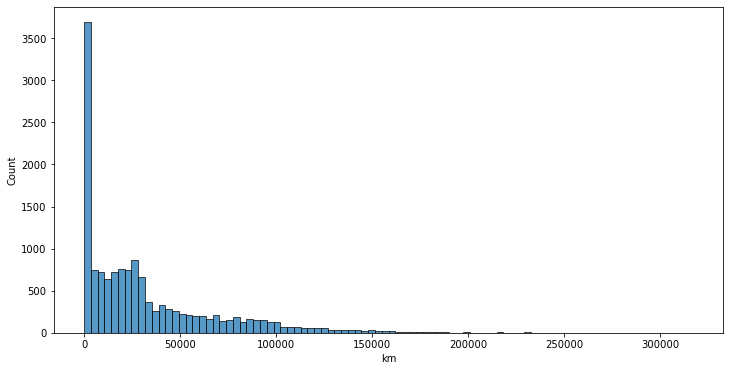

In [32]:
plt.figure(figsize =[12,6])
sns.histplot(df.km)

# hp

In [33]:
df.hp.isnull().sum()

85

<AxesSubplot:xlabel='hp', ylabel='Count'>

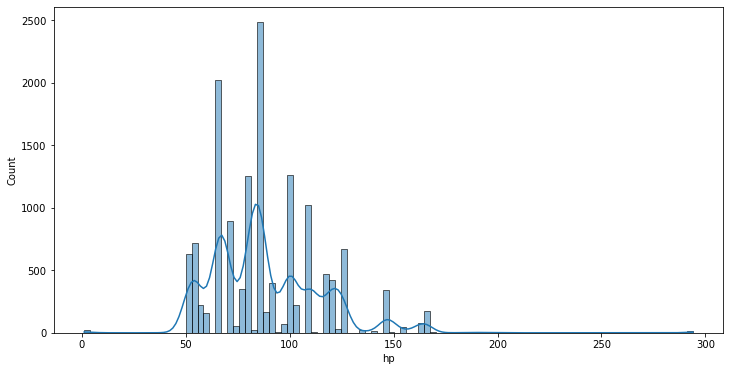

In [34]:
plt.figure(figsize =[12,6])
sns.histplot(df.hp, kde =True)

In [35]:
for i in model_liste:
    df.loc[(df.make_model == i) & (df.hp.isnull()), 'hp'] = df[df.make_model == i].hp.median()

In [36]:
df.hp.isnull().sum()

0

# Previous Owners

<AxesSubplot:xlabel='Previous Owners', ylabel='count'>

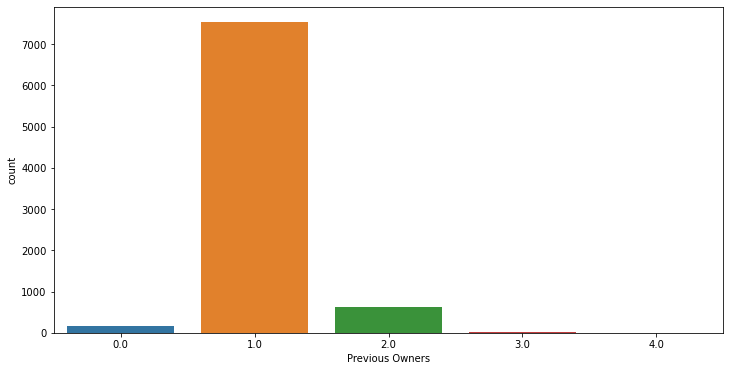

In [37]:
plt.figure(figsize =[12,6])
sns.countplot(df["Previous Owners"])

In [38]:
df["Previous Owners"].isnull().sum()

6071

In [39]:
df.vehicle_condition[(df["Previous Owners"].isnull())].value_counts()

Used              4317
New               1280
Pre-registered     474
Name: vehicle_condition, dtype: int64

In [40]:
df.loc[(df["Previous Owners"].isnull()) & (df.vehicle_condition == 'New'), "Previous Owners"] = 0 
#vehicle_conditionı New olan Previous Owners null satırlarını 0 ile doldurduk

In [41]:
df.vehicle_condition[(df["Previous Owners"].isnull())].value_counts()
#New ler dolsu şimdi Used olanları doldurmak gerek.

Used              4317
Pre-registered     474
Name: vehicle_condition, dtype: int64

In [42]:
df.loc[(df["Previous Owners"].isnull()) & (df.vehicle_condition == 'Used'), "Previous Owners"] = 1
#vehicle_conditionı Used olan Previous Owners null satırlarını 1 ile doldurduk.
# En fazla 1 used olduğu için 1 ile dolduruldu.

In [1]:
df.loc[(df["Previous Owners"].isnull()) & (df.vehicle_condition == 'Pre-registered'), "Previous Owners"] = 0 


NameError: name 'df' is not defined

In [43]:
df["Previous Owners"].isnull().sum()

474

# Inspection New

In [44]:
df['Inspection new'].value_counts(dropna = False)
# Null değeri yok. Grafiğini çizip durumuna bakalım

False    9659
True     4748
Name: Inspection new, dtype: int64

<AxesSubplot:xlabel='Inspection new', ylabel='count'>

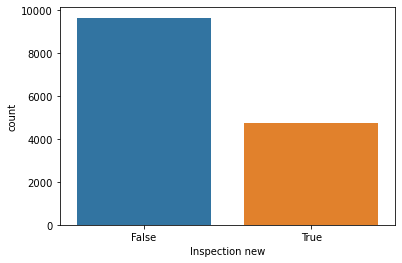

In [45]:
sns.countplot(df['Inspection new'])
#Muayenesi yeni olanların sayısı daha az.

# Warranty

In [46]:
df.Warranty.isnull().sum()
#Sütunları düzenlerken Nan olan değerlerin garantisinin olmadığı düşünülüp 0 atanmıştı.

0

In [47]:
df.Warranty.value_counts()

0.0     10552
24.0     1799
12.0     1329
60.0      373
36.0      134
6.0        49
72.0       44
48.0       38
3.0        14
23.0       10
18.0        7
20.0        7
25.0        5
2.0         4
16.0        4
50.0        4
34.0        3
17.0        2
46.0        2
45.0        2
22.0        2
14.0        2
26.0        2
21.0        2
11.0        2
1.0         2
13.0        2
15.0        1
56.0        1
10.0        1
28.0        1
19.0        1
65.0        1
7.0         1
40.0        1
49.0        1
33.0        1
47.0        1
Name: Warranty, dtype: int64

<AxesSubplot:xlabel='Warranty', ylabel='Count'>

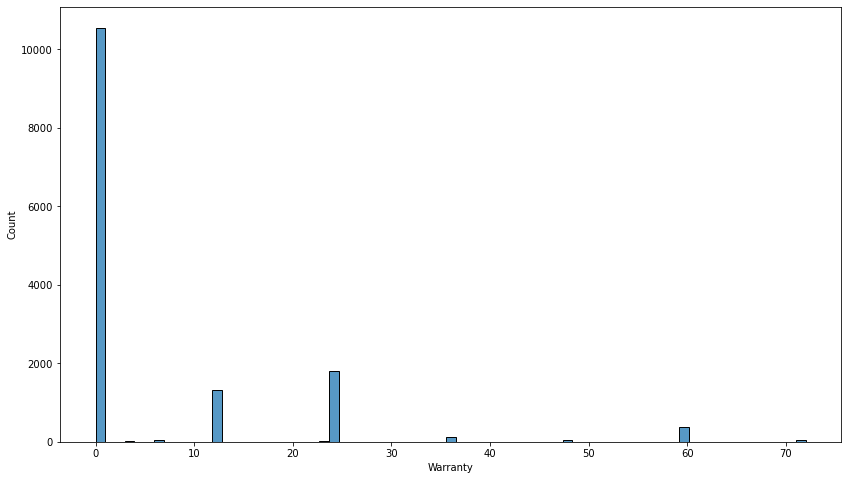

In [48]:
plt.figure(figsize = [14,8])
sns.histplot(df.Warranty)

# Body Color

In [49]:
df['Body Color'].isnull().sum()

528

In [50]:
color = df['Body Color'].value_counts()

In [51]:
color

Black     3454
Grey      3159
White     2984
Silver    1533
Blue      1325
Red        840
Brown      265
Green      145
Beige       97
Yellow      48
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

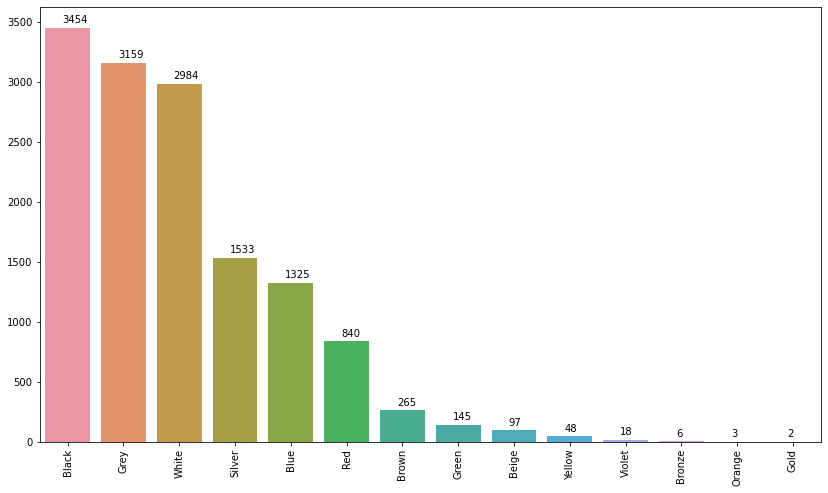

In [52]:
plt.figure(figsize = [14,8])
sns.barplot(x = color.index, y= color.values);
plt.xticks(rotation =90);
for i,v in enumerate(color.values):
    plt.text(i-0.1,v+40,str(v))

In [53]:
df['Body Color'].fillna(df['Body Color'].mode()[0], inplace = True) #ffill ile doldur

In [54]:
df['Body Color'].value_counts(dropna = False)

Black     3982
Grey      3159
White     2984
Silver    1533
Blue      1325
Red        840
Brown      265
Green      145
Beige       97
Yellow      48
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

# Paint Type

In [55]:
df['Paint Type'].value_counts(dropna = False)

metallic        8994
non_metallic    5413
Name: Paint Type, dtype: int64

<AxesSubplot:xlabel='Paint Type', ylabel='count'>

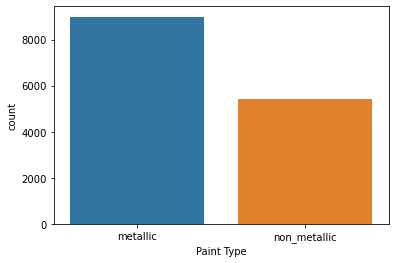

In [56]:
sns.countplot(df['Paint Type'])

# Nr. of Doors

In [57]:
df['Nr. of Doors'].value_counts(dropna = False)

5.0    10503
4.0     2813
3.0      754
2.0      194
NaN      141
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [58]:
null_doors = df[df['Nr. of Doors'].isnull()]['make_model'].value_counts().index.to_list()
#Kapı sayısı boş olanların modelleri. Bu modellerin kapı sayılarına bakıp en fazla olanı şle doldurabiliriz

In [59]:
null_doors

['Opel Corsa',
 'Renault Clio',
 'Audi A1',
 'Opel Insignia',
 'Opel Astra',
 'Audi A3',
 'Renault Espace']

In [60]:
for i in null_doors:
    print(df[df['make_model'] == i]['Nr. of Doors'].value_counts())
# Tüm modellerin en fazla sayıda olan arabalar 5 kapılı olduğu için tüm null değerleri 5 ile doldururuz.
#Zaten genelde de 5 kapılı araba sayısı diğerlerine oranla oldukça fazlaydı.

5.0    1205
3.0     436
4.0     285
2.0      93
Name: Nr. of Doors, dtype: int64
5.0    1305
4.0     163
1.0       1
Name: Nr. of Doors, dtype: int64
5.0    1612
4.0     477
3.0     210
2.0      74
Name: Nr. of Doors, dtype: int64
5.0    1690
4.0     704
Name: Nr. of Doors, dtype: int64
5.0    1828
4.0     476
3.0       4
Name: Nr. of Doors, dtype: int64
5.0    2034
4.0     630
3.0     104
2.0      27
Name: Nr. of Doors, dtype: int64
5.0    794
4.0     78
7.0      1
Name: Nr. of Doors, dtype: int64


In [61]:
df['Nr. of Doors'].fillna(5, inplace = True)

In [62]:
df['Nr. of Doors'].value_counts(dropna = False)

5.0    10644
4.0     2813
3.0      754
2.0      194
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

<AxesSubplot:xlabel='Nr. of Doors', ylabel='count'>

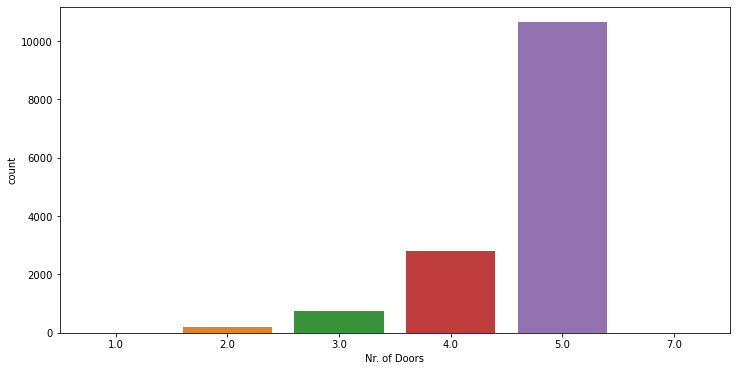

In [63]:
plt.figure(figsize = [12,6])
sns.countplot(df['Nr. of Doors'])

# Nr. of Seats

In [64]:
df['Nr. of Seats'].value_counts(dropna =False)
#En fazla 5 koltuklu olan dan var ama modellere göre de bir inceleyelim.

5.0    12078
4.0     1074
NaN      856
7.0      310
2.0       86
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [65]:
null_seats = df[df['Nr. of Seats'].isnull()]['make_model'].value_counts().index.to_list()

In [66]:
null_seats

['Renault Clio',
 'Opel Astra',
 'Audi A1',
 'Renault Espace',
 'Audi A3',
 'Opel Insignia',
 'Opel Corsa']

In [67]:
for i in null_seats:
    print(df[df['make_model'] == i]['Nr. of Seats'].value_counts())
# Modellere göre de incelediğimizde tüm modellerde en fazla 5 koltuklu olduğu için tüm null değerleri 5 ile doldururuz.

5.0    1243
2.0      80
4.0       5
Name: Nr. of Seats, dtype: int64
5.0    2176
4.0       5
Name: Nr. of Seats, dtype: int64
5.0    1231
4.0    1029
3.0       1
6.0       1
Name: Nr. of Seats, dtype: int64
5.0    460
7.0    310
6.0      1
4.0      1
Name: Nr. of Seats, dtype: int64
5.0    2676
4.0      25
Name: Nr. of Seats, dtype: int64
5.0    2314
4.0       2
2.0       1
Name: Nr. of Seats, dtype: int64
5.0    1943
4.0       7
2.0       5
Name: Nr. of Seats, dtype: int64


In [68]:
df['Nr. of Seats'].fillna(5, inplace = True)

<AxesSubplot:xlabel='Nr. of Seats', ylabel='count'>

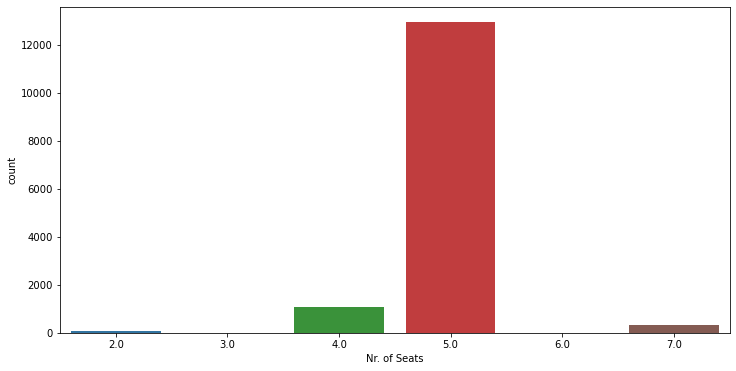

In [69]:
plt.figure(figsize = [12,6])
sns.countplot(df['Nr. of Seats'])

# Gearing Type

In [70]:
df['Gearing Type'].value_counts(dropna = False)
#Temiz bir sütun. Null değeri yok.

Manual            7317
Automatic         6625
Semi-automatic     465
Name: Gearing Type, dtype: int64

<AxesSubplot:xlabel='Gearing Type', ylabel='count'>

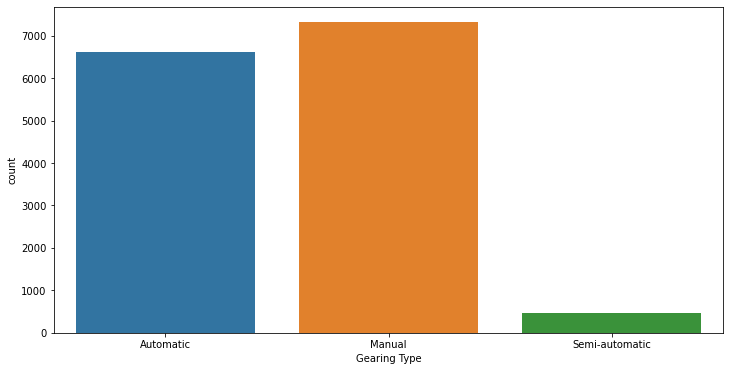

In [71]:
plt.figure(figsize = [12,6])
sns.countplot(df['Gearing Type'])

# Displacement

In [72]:
df.Displacement.value_counts(dropna = False)

1598.0    4386
999.0     2262
1398.0    1255
1399.0     672
1956.0     635
          ... 
1390.0       1
1856.0       1
140.0        1
1995.0       1
1696.0       1
Name: Displacement, Length: 78, dtype: int64

In [73]:
df.Displacement.isnull().sum()

364

In [74]:
df.Displacement.max()

16000.0

In [75]:
df.Displacement.min()

1.0

In [76]:
df.Displacement.mean()

1426.626148258919

In [77]:
df.Displacement.median()

1461.0

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

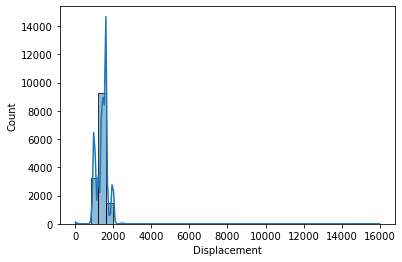

In [78]:
sns.histplot(df.Displacement, bins = 40, kde = True)

In [79]:
df.Displacement.fillna(df.Displacement.mean(), inplace = True)

# Cylinders(drop)

In [80]:
df.Cylinders.value_counts(dropna = False)

4.0    7402
NaN    5013
3.0    1962
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

In [81]:
df[df.Cylinders.isnull()]['make_model'].value_counts()

Opel Astra        998
Opel Insignia     942
Audi A1           745
Opel Corsa        743
Audi A3           724
Renault Clio      556
Renault Espace    303
Audi A2             1
Renault Duster      1
Name: make_model, dtype: int64

In [82]:
null_cylinders =df[df.Cylinders.isnull()]['make_model'].value_counts().index.to_list()

In [83]:
null_cylinders

['Opel Astra',
 'Opel Insignia',
 'Audi A1',
 'Opel Corsa',
 'Audi A3',
 'Renault Clio',
 'Renault Espace',
 'Audi A2',
 'Renault Duster']

In [84]:
for i in null_cylinders:
    print(i, df[df['make_model'] == i]['Cylinders'].value_counts(), sep = '\n')
# Audi A1'in null değerlerini 3 diğerlerini 4 ile doldurmak gerekir.

Opel Astra
4.0    1157
3.0     170
Name: Cylinders, dtype: int64
Opel Insignia
4.0    1467
6.0       3
2.0       1
Name: Cylinders, dtype: int64
Audi A1
3.0    1270
4.0     380
8.0       1
Name: Cylinders, dtype: int64
Opel Corsa
4.0    1295
3.0       9
1.0       1
Name: Cylinders, dtype: int64
Audi A3
4.0    1715
3.0     349
5.0      21
Name: Cylinders, dtype: int64
Renault Clio
4.0    775
3.0    164
5.0      1
Name: Cylinders, dtype: int64
Renault Espace
4.0    580
2.0      1
8.0      1
Name: Cylinders, dtype: int64
Audi A2
Series([], Name: Cylinders, dtype: int64)
Renault Duster
4.0    33
Name: Cylinders, dtype: int64


In [85]:
for i in null_cylinders:
    if i == 'Audi A1':
        df.loc[(df["Cylinders"].isnull()) & (df.make_model == i), "Cylinders"] = 3
    else:
        df.loc[(df["Cylinders"].isnull()) & (df.make_model == i), "Cylinders"] = 4


In [86]:
df.Cylinders.isnull().sum()

0

# Drive chain

In [87]:
df['Drive chain'].value_counts(dropna = False)
#Temiz bir sütun

front    7958
NaN      6294
4WD       151
rear        4
Name: Drive chain, dtype: int64

In [88]:
df[df['Drive chain'].isnull()]['make_model'].value_counts()

Opel Astra        1081
Opel Insignia     1064
Audi A3           1031
Opel Corsa         984
Renault Clio       844
Audi A1            812
Renault Espace     446
Renault Duster      32
Name: make_model, dtype: int64

In [89]:
null_chain =df[df['Drive chain'].isnull()]['make_model'].value_counts().index.to_list()

In [90]:
null_chain

['Opel Astra',
 'Opel Insignia',
 'Audi A3',
 'Opel Corsa',
 'Renault Clio',
 'Audi A1',
 'Renault Espace',
 'Renault Duster']

In [91]:
for i in null_chain:
    print(i, df[df['make_model'] == i]['Drive chain'].value_counts(), sep = '\n')
# Renault Duster 4WD, diğerlerini front ile doldurmak gerekir

Opel Astra
front    1242
4WD         2
Name: Drive chain, dtype: int64
Opel Insignia
front    1256
4WD        90
rear        3
Name: Drive chain, dtype: int64
Audi A3
front    1759
4WD        19
Name: Drive chain, dtype: int64
Opel Corsa
front    1064
Name: Drive chain, dtype: int64
Renault Clio
front    641
4WD       10
rear       1
Name: Drive chain, dtype: int64
Audi A1
front    1581
4WD         3
Name: Drive chain, dtype: int64
Renault Espace
front    414
4WD       25
Name: Drive chain, dtype: int64
Renault Duster
4WD    2
Name: Drive chain, dtype: int64


In [92]:
for i in null_chain:
    if i == 'Renault Duster':
        df.loc[(df["Drive chain"].isnull()) & (df.make_model == i), "Drive chain"] = '4WD'
    else:
        df.loc[(df["Drive chain"].isnull()) & (df.make_model == i), "Drive chain"] = 'front'

In [93]:
df["Drive chain"].value_counts(dropna = False)

front    14220
4WD        183
rear         4
Name: Drive chain, dtype: int64

<AxesSubplot:xlabel='Drive chain', ylabel='count'>

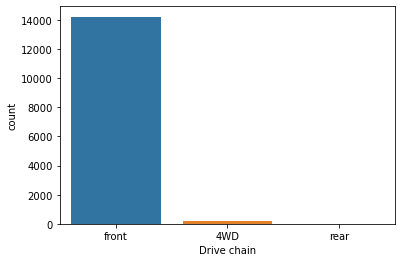

In [94]:
sns.countplot(df['Drive chain'])
#Neredeyse tüm arabaların drive chain i front

# CO2 Emission

In [95]:
df['CO2 Emission'].value_counts(dropna = False)

NaN        2249
120.000     651
97.000      504
99.000      479
102.000     468
           ... 
12.324        1
181.000       1
51.000        1
45.000        1
253.000       1
Name: CO2 Emission, Length: 123, dtype: int64

<AxesSubplot:xlabel='CO2 Emission', ylabel='Count'>

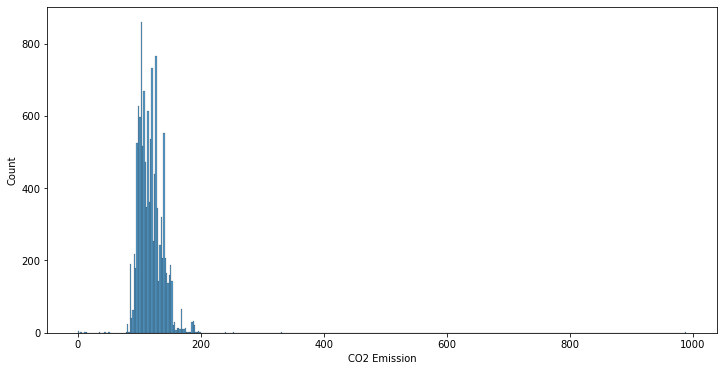

In [96]:
plt.figure(figsize = [12,6])
sns.histplot(df['CO2 Emission'])

In [97]:
for i in model_liste:
    df.loc[(df.make_model == i) & (df['CO2 Emission'].isnull()), 'CO2 Emission'] = df[df.make_model == i]["CO2 Emission"].median()

# 'Emission Class'

In [98]:
liste = df[df['Emission Class'].isnull()]["make_model"].value_counts().index.to_list()


In [99]:
for i in liste:
    df.loc[(df.make_model == i) & (df['Emission Class'].isnull()), 'Emission Class'] = df[df.make_model == i]["Emission Class"].mode()[0]

<AxesSubplot:xlabel='Emission Class', ylabel='count'>

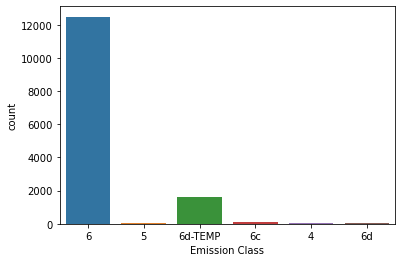

In [100]:
sns.countplot(df['Emission Class'])

# Gears

In [101]:
df.Gears.value_counts(dropna = False)

6.0     5309
NaN     4192
5.0     2952
7.0     1744
8.0      199
9.0        4
3.0        2
1.0        2
50.0       1
4.0        1
2.0        1
Name: Gears, dtype: int64

In [102]:
null_gears = df[df['Gears'].isnull()]['make_model'].value_counts().index.to_list()

In [103]:
null_gears

['Audi A1',
 'Opel Astra',
 'Audi A3',
 'Opel Insignia',
 'Opel Corsa',
 'Renault Clio',
 'Renault Espace',
 'Renault Duster',
 'Audi A2']

In [104]:
for i in null_gears:
    print(i, df[df['make_model'] == i]['Gears'].value_counts(), sep = '\n')

Audi A1
5.0    786
7.0    605
6.0    162
8.0      2
Name: Gears, dtype: int64
Opel Astra
6.0    1262
5.0     367
7.0       1
Name: Gears, dtype: int64
Audi A3
6.0    1121
7.0    1004
5.0       2
Name: Gears, dtype: int64
Opel Insignia
6.0    1527
8.0     196
5.0       7
7.0       2
Name: Gears, dtype: int64
Opel Corsa
5.0    1047
6.0     440
8.0       1
2.0       1
1.0       1
Name: Gears, dtype: int64
Renault Clio
5.0     741
6.0     344
7.0       3
50.0      1
1.0       1
Name: Gears, dtype: int64
Renault Espace
6.0    428
7.0    129
9.0      4
3.0      2
5.0      2
4.0      1
Name: Gears, dtype: int64
Renault Duster
6.0    25
Name: Gears, dtype: int64
Audi A2
Series([], Name: Gears, dtype: int64)


In [105]:
for i in null_chain:
    df.loc[(df["Gears"].isnull()) & (df.make_model == i), "Gears"] = df[df.make_model == i]["Gears"].mode()[0]


In [106]:
df["Gears"].isnull().sum()
# Audi A2 yi doldurmadı. Datamızda 1 tane Audi A2 var ve çok boş değeri var. Audi A2 satırı düşürülmeli diye düşünüyorum

1

In [107]:
df[(df.make_model=='Audi A2')].index

Int64Index([2614], dtype='int64')

In [108]:
for i in df[(df.make_model=='Audi A2')].index:
    df.drop(i, inplace = True)

In [109]:
df["Gears"].isnull().sum()

0

# Country version(drop)

In [110]:
df['Country version'].value_counts(dropna = False)

NaN               7447
Germany           4017
Italy             1028
Netherlands        461
European Union     406
Spain              318
Belgium            314
Austria            203
Czech Republic      50
France              38
Poland              36
Denmark             33
Hungary             28
Japan                8
Croatia              4
Sweden               3
Slovakia             3
Bulgaria             2
Romania              2
Luxembourg           1
Slovenia             1
Egypt                1
Switzerland          1
Serbia               1
Name: Country version, dtype: int64

In [111]:
null_country = df[df['Country version'].isnull()]['make_model'].value_counts().index.to_list()

In [112]:
null_country

['Audi A3',
 'Audi A1',
 'Opel Astra',
 'Opel Insignia',
 'Opel Corsa',
 'Renault Clio',
 'Renault Espace',
 'Renault Duster']

In [113]:
for i in null_country:
    print(i, df[df['make_model'] == i]['Country version'].value_counts(), sep = '\n')
# Genele de baktığımızda modellere göre ülkeleri de incelediğimizde Germany ilk sırada. 
# O sebeple nulları Germany ile doldurulur.

Audi A3
Germany           374
Italy             351
European Union    165
Belgium            86
Spain              59
Netherlands        38
Austria            18
Czech Republic     16
Denmark            15
France              6
Hungary             6
Poland              4
Sweden              2
Slovenia            1
Name: Country version, dtype: int64
Audi A1
Germany           651
Italy             155
Netherlands        68
Spain              57
Belgium            48
European Union     47
Austria            19
Denmark            15
France              5
Poland              2
Romania             1
Slovakia            1
Luxembourg          1
Switzerland         1
Name: Country version, dtype: int64
Opel Astra
Germany           790
Italy              96
Netherlands        77
European Union     61
Spain              47
Belgium            35
Czech Republic     31
Austria            15
Poland             10
Hungary             7
Croatia             2
Romania             1
France              1

In [114]:
df['Country version'].fillna('Germany', inplace = True)

# age

In [115]:
df.age.value_counts(dropna = False)

1.0    4290
3.0    3319
2.0    2902
0.0    2518
NaN    1377
Name: age, dtype: int64

In [116]:
df.age[(df.vehicle_condition == 'New')].isnull().sum()
# Nerdeyse tamamı new .

1328

In [117]:
df.loc[(df.vehicle_condition == 'New') & (df.age.isnull()),'age'] = 0

In [118]:
df.loc[(df.vehicle_condition == 'Used') & (df.age.isnull()), 'age'] = 1
#Usedlarda en çok 1 olduğu için 1 atadım

In [2]:
df.loc[(df.vehicle_condition == 'Pre_registered') & (df.age.isnull()),'age'] = 0

NameError: name 'df' is not defined

In [119]:
df.age.value_counts(dropna = False)

1.0    4333
0.0    3846
3.0    3319
2.0    2902
NaN       6
Name: age, dtype: int64

# 'Fuel'

In [120]:
df['Fuel'].value_counts(dropna = False)


Gasoline            7721
Diesel              6612
CNG                   33
LPG                   27
Others                 6
ElectricGasoline       4
Biodiesel              1
Electric               1
Biogas                 1
Name: Fuel, dtype: int64

# Upholstery_type

In [121]:
df.Upholstery_type.value_counts(dropna = False)

Cloth           7744
NaN             4354
Part leather    1358
Full leather     950
Name: Upholstery_type, dtype: int64

In [122]:
df.Upholstery_type.fillna('Cloth', inplace = True)
#Açık ara farkla Ckoth daha fazla olduğu için cloth ile dolduruldu.

# Consumption(comb)

In [123]:
df['Consumption(comb)'].value_counts(dropna = False)

NaN     1815
3.9      683
4.0      639
5.4      630
4.4      605
        ... 
55.0       1
1.2        1
9.1        1
46.0       1
43.0       1
Name: Consumption(comb), Length: 73, dtype: int64

<AxesSubplot:xlabel='Consumption(comb)', ylabel='Count'>

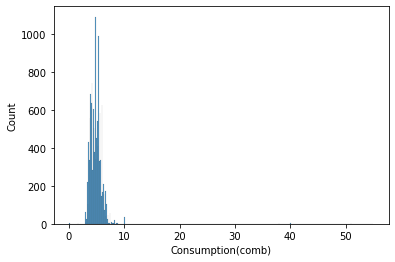

In [124]:
sns.histplot(df['Consumption(comb)'])

In [125]:
consumption_model = df[df['Consumption(comb)'].isnull()].make_model.value_counts().index.to_list()

In [126]:
consumption_model

['Opel Insignia',
 'Opel Astra',
 'Audi A3',
 'Renault Clio',
 'Opel Corsa',
 'Audi A1',
 'Renault Espace',
 'Renault Duster']

In [127]:
for i in consumption_model:
    df.loc[(df.make_model == i) & (df['Consumption(comb)'].isnull()), 'Consumption(comb)'] = df[(df.make_model == i)]['Consumption(comb)'].median()
    

# Consumption(city)

In [128]:
df['Consumption(city)'].value_counts(dropna = False)

NaN     2282
5.0      613
5.8      577
4.5      548
4.3      493
        ... 
16.1       1
19.9       1
10.4       1
9.7        1
64.0       1
Name: Consumption(city), Length: 87, dtype: int64

<AxesSubplot:xlabel='Consumption(city)', ylabel='Count'>

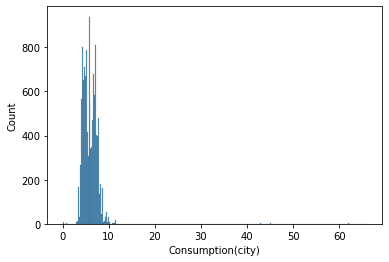

In [129]:
sns.histplot(df['Consumption(city)'])

In [130]:
city_model = df[df['Consumption(city)'].isnull()].make_model.value_counts().index.to_list()

In [131]:
for i in city_model:
    df.loc[(df.make_model == i) & (df['Consumption(city)'].isnull()), 'Consumption(city)'] = df[(df.make_model == i)]['Consumption(city)'].median()
    

# Consumption(country)

In [132]:
df['Consumption(country)'].value_counts(dropna = False)

NaN     2222
4.2     1042
3.7     1000
4.4      798
4.5      725
3.8      724
3.9      719
4.7      578
4.1      541
4.0      540
3.5      491
3.6      476
4.6      473
4.9      448
3.3      423
4.3      418
3.1      364
3.4      328
4.8      326
5.3      268
5.4      214
5.1      185
3.2      158
5.7      152
5.6      149
3.0      122
5.0      117
5.2      112
6.3       47
6.0       37
5.5       36
10.0      32
5.8       30
6.6       19
2.9       16
6.4       13
2.8        9
0.0        9
7.7        6
7.3        4
44.0       4
6.5        4
7.0        3
7.1        3
6.1        2
5.9        2
37.0       2
6.9        2
7.8        2
35.0       2
6.7        2
1.0        1
8.0        1
2.0        1
7.6        1
10.3       1
42.0       1
8.6        1
Name: Consumption(country), dtype: int64

In [133]:
country_model = df[df['Consumption(country)'].isnull()].make_model.value_counts().index.to_list()

In [134]:
for i in country_model:
    df.loc[(df.make_model == i) & (df['Consumption(country)'].isnull()), 'Consumption(country)'] = df[(df.make_model == i)]['Consumption(country)'].median()
    

In [142]:
df.to_csv('full.csv', index= False)